In [1]:
%matplotlib inline
import eos
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from ipy_table import *

Preparation
===

In [2]:
p = eos.Parameters.Defaults()
pVub = p[r'CKM::abs(V_ub)']
pVub

$$|V_{ub}|$$,(eos.Parameter)
current value,0.0
default value,0.0


No need for kinematics, so we use an empty Kinematics object

In [3]:
k = eos.Kinematics()

We want to evaluate the observable whilst changing the values of the CKM elements outside any parametrization. We therefore use the CKM Scan Model (CKMScan)

In [4]:
o = eos.Options(model='CKMScan', l='tau')

Create the observable

In [5]:
br = eos.Observable.make("B_u->lnu::BR", p, k, o)
br

B_u->lnu::BR,(eos.Observable)
current value,0


Produce Uncertainty Samples
===

In [6]:
samplesVub = np.random.normal(4.2e-3, 0.4e-3, 100000)
samplesBR = []
for Vub in samplesVub:
    pVub.set(Vub)
    samplesBR.append(br.evaluate())

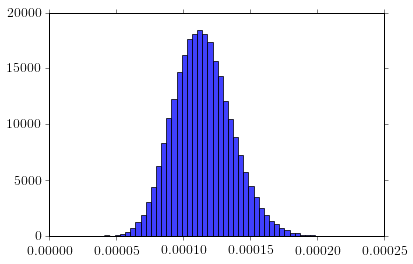

In [7]:
_, _, hist = plt.hist(samplesBR, 50, normed=1, facecolor='blue', alpha=0.75)

In [8]:
make_table(
[
    ['median', "{:.3E}".format(np.median(samplesBR))],
    ['mean', "{:.3E}".format(np.mean(samplesBR))],
    ['std', "{:.3E}".format(np.std(samplesBR))]
])

median,1.134E-04
mean,1.144E-04
std,2.172E-05
